# Image Classification for Clothing

The Problem:
A neural network model is trained to recognize and categorize different types of clothing items based on input images. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each image is a 28x28 grayscale image with 10 classes of a label. This dataset is a direct drop-in for the MNIST dataset.

# The Fashion MNIST Dataset

### Loading the data into the memory

Import the libraries that will be used
* tenserflow (tf)
* numpy (np)
* mathplotlib.pyplot (plt)




In [ ]:
!pip install tensorflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Load the Fashion-MNIST data

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

The images are mapped to a label where the labels are split into:
* T-shirt
* Trousers
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Boot


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:



In [ ]:
class_names = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

# Exploring the Fashion-MNIST dataset

There are 60,000 images in the training set and each image represented as 28x28 pixels

In [ ]:
x_train.shape

(60000, 28, 28)

There are 10,000 images in the test set and each image represented as 28x28

In [ ]:
x_valid.shape

(10000, 28, 28)

This shows that each label is an integer between 0 and 9 (representing each class name).

In [ ]:
y_train
y_valid

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

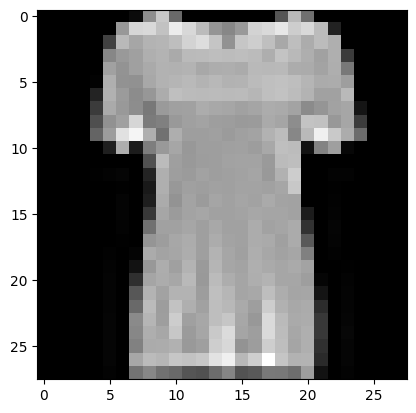

In [ ]:
import matplotlib.pyplot as plt

image = x_train[10]
plt.imshow(image, cmap='gray')

In [ ]:
y_train[10]

0

# Prepare data for training

## Flatten Image

Simplify the data. Reshape it into one array of 784 (28x28).

In [ ]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [ ]:
x_train.shape

(60000, 784)

## Normalize the data.

In [ ]:
# Before Normalization
x_train.min()

0

In [ ]:
# Before Normalization
x_train.max()

255

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

In [ ]:
# After Normalization
x_train.min()

0.0

In [ ]:
# After Normalization
x_train.max()

1.0

## Categorize the labels.

In [ ]:
import tensorflow.keras as keras

n = 10
y_train = keras.utils.to_categorical(y_train, n)
y_valid = keras.utils.to_categorical(y_valid, n)

In [ ]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

# Creating the model

## Initializing the model.

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

## Creating the input layer.

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

## Creating the hidden layer.

In [ ]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

## Creating the output

In [ ]:
model.add(Dense(units=10, activation='softmax'))

## Repeat but with multiple layers...

In [ ]:
from tensorflow.keras.layers import Dense

# Input layer
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

# First hidden layer
model.add(Dense(units=512, activation='relu'))

# Second hidden layer
model.add(Dense(units=256, activation='relu'))

# Third hidden layer
model.add(Dense(units=128, activation='relu'))

# Fourth hidden layer
model.add(Dense(units=64, activation='relu'))

# Output layer
model.add(Dense(units=10, activation='softmax'))


## Summarize the model

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dense_41 (Dense)            (None, 512)               262656    
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 10)                650       
                                                                 
Total params: 837706 (3.20 MB)
Trainable params: 8377

Compile the model.

In [ ]:
model.compile( optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Training the model.

In [ ]:
history = model.fit(x_train, y_train, verbose=1, epochs=5, validation_data=(x_valid, y_valid))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5577: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 32s 17ms/step - loss: 0.5045 - accuracy: 0.8154 - val_loss: 0.4215 - val_accuracy: 0.8495
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3805 - accuracy: 0.8623 - val_loss: 0.4072 - val_accuracy: 0.8554
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3331 - accuracy: 0.8798 - val_loss: 0.3821 - val_accuracy: 0.8695
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3122 - accuracy: 0.8871 - val_loss: 0.3586 - val_accuracy: 0.8722
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2950 - accuracy: 0.8920 - val_loss: 0.3604 - val_accuracy: 0.8699


# Plot the results

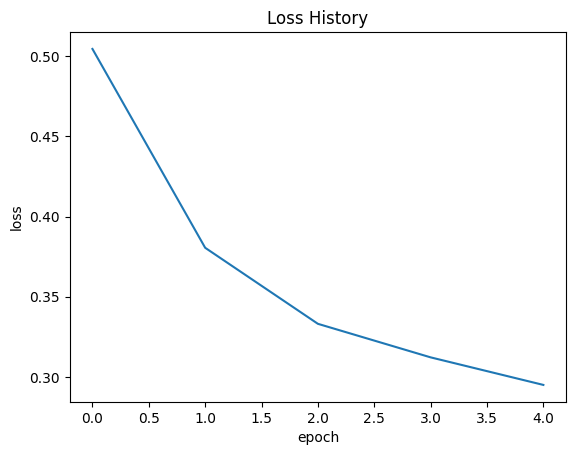

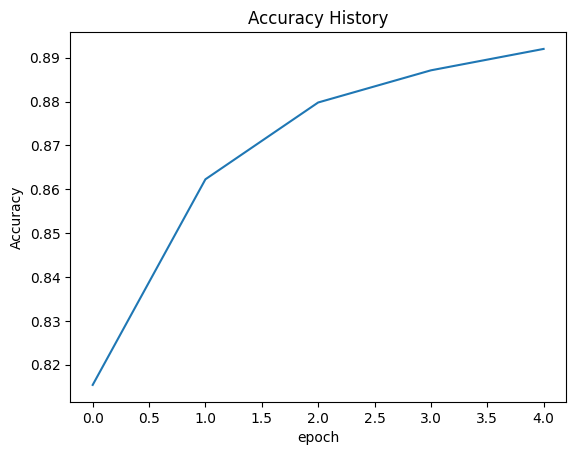

In [ ]:
def plot_acc(hist):
  # plot the accuracy
  plt.title('Accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()

def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

plot_loss(history)
plot_acc(history)